# FAIR2Adapt Case study 1 (CS1) sample dataset

## Context

### Purpose

The FAIR2Adapt CS1 "Spread of radioactive isotopes in the Arctic under different climate scenarios to understand the climate change impact on radionuclide distribution for public and environmental safety" is owned by NERSC (Norway). The goal is to get familiar with this type of data.

### Description

In this notebook, we will:
- Open datasets (DOI: [10.11582/2024.00093](https://doi.org/10.11582/2024.00093)) that were downloaded from the NIRD archive and deposited in the EOSC bucket of FAIR2Adapt 
- Check some metadata and select a variable to plot.

## Contributions

### Notebook

- Anne Fouilloux, Simula Research Laboratory (Norway) (author), @annefou
- Even Moa Myklebust, Simula Research Laboratory (Norway) (reviewer), @evenmm

## Bibliography and other interesting resources

- [The Norwegian Earth System Model (NorESM)](https://noresm-docs.readthedocs.io/en/latest/)
- NorESM dataset used in this notebook, [10.11582/2024.00093](https://doi.org/10.11582/2024.00093)

## Import Libraries

In [17]:
import s3fs
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Open one history file from the Ocean (MICOM model) component

In [3]:
client_kwargs={'endpoint_url': 'https://pangeo-eosc-minioapi.vm.fedcloud.eu/'}


s3 = s3fs.S3FileSystem(anon=True, client_kwargs=client_kwargs)

filename = "s3://afouilloux-fair2adapt/10.11582_2024.00093/N1850_f19_tn14_20190722/ocn/hist/N1850_f19_tn14_20190722.micom.hbgcd.1801-01.nc"

s3.ls(filename)

['afouilloux-fair2adapt/10.11582_2024.00093/N1850_f19_tn14_20190722/ocn/hist/N1850_f19_tn14_20190722.micom.hbgcd.1801-01.nc']

In [4]:
ds = xr.open_dataset(s3.open(filename))
ds

<xarray.Dataset> Size: 103MB
Dimensions:     (time: 31, sigma: 53, depth: 70, bounds: 2, y: 385, x: 360)
Coordinates:
  * time        (time) object 248B 1801-01-01 12:00:00 ... 1801-01-31 12:00:00
  * sigma       (sigma) float64 424B 27.22 27.72 28.2 28.68 ... 37.48 37.58 37.8
  * depth       (depth) float64 560B 0.0 5.0 10.0 ... 6.25e+03 6.5e+03 6.75e+03
Dimensions without coordinates: bounds, y, x
Data variables:
    depth_bnds  (depth, bounds) float64 1kB ...
    co2fxd      (time, y, x) float32 17MB ...
    co2fxu      (time, y, x) float32 17MB ...
    srfdissic   (time, y, x) float32 17MB ...
    srftalk     (time, y, x) float32 17MB ...
    srfphyc     (time, y, x) float32 17MB ...
    ppint       (time, y, x) float32 17MB ...

## Simple plot of one variable (Surface dissolved inorganic carbon)

In [7]:
ds.srfdissic

<xarray.DataArray 'srfdissic' (time: 31, y: 385, x: 360)> Size: 17MB
[4296600 values with dtype=float32]
Coordinates:
  * time     (time) object 248B 1801-01-01 12:00:00 ... 1801-01-31 12:00:00
Dimensions without coordinates: y, x
Attributes:
    units:          mol C m-3
    long_name:      Surface dissolved inorganic carbon
    cell_measures:  area: parea

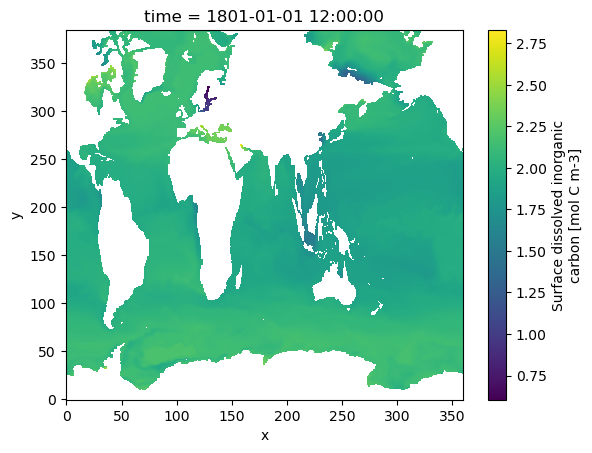

In [8]:
ds.srfdissic.isel(time=0).plot()

## Open one history file from the Atmosphere component

In [9]:
filename = "s3://afouilloux-fair2adapt/10.11582_2024.00093/N1850_f19_tn14_20190722/atm/hist/N1850_f19_tn14_20190722.cam.h0.1801-01.nc"

In [10]:
ds = xr.open_dataset(s3.open(filename))
ds

<xarray.Dataset> Size: 583MB
Dimensions:               (lat: 96, zlon: 1, nbnd: 2, lon: 144, lev: 32,
                           ilev: 33, time: 1)
Coordinates:
  * lat                   (lat) float64 768B -90.0 -88.11 -86.21 ... 88.11 90.0
  * zlon                  (zlon) float64 8B 0.0
  * lon                   (lon) float64 1kB 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * lev                   (lev) float64 256B 3.643 7.595 14.36 ... 976.3 992.6
  * ilev                  (ilev) float64 264B 2.255 5.032 10.16 ... 985.1 1e+03
  * time                  (time) object 8B 1801-02-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/1194)
    zlon_bnds             (zlon, nbnd) float64 16B ...
    gw                    (lat) float64 768B ...
    hyam                  (lev) float64 256B ...
    hybm                  (lev) float64 256B ...
    P0                    float64 8B ...
    hyai                  (ilev) float64 264B ...
    ...                    ...
    mmr_OM                (time, lev, lat, lon) float32 2MB ...
    mmr_SALT              (time, lev, lat, lon) float32 2MB ...
    mmr_SULFATE           (time, lev, lat, lon) float32 2MB ...
    monoterp              (time, lev, lat, lon) float32 2MB ...
    monoterp_SRF          (time, lat, lon) float32 55kB ...
    ozone                 (time, lev, lat, lon) float32 2MB ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              N1850_f19_tn14_20190722
    logname:           olivie
    host:              
    initial_file:      /cluster/shared/noresm/inputdata/atm/cam/inic/fv/cami-...
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_1.9x2...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

## Simple plot

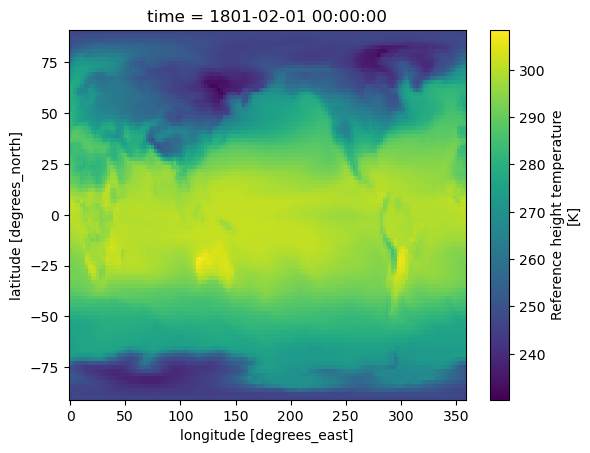

In [11]:
ds.TREFHT.isel(time=0).plot()

## Customize plot
- set the figure size
- set the projection

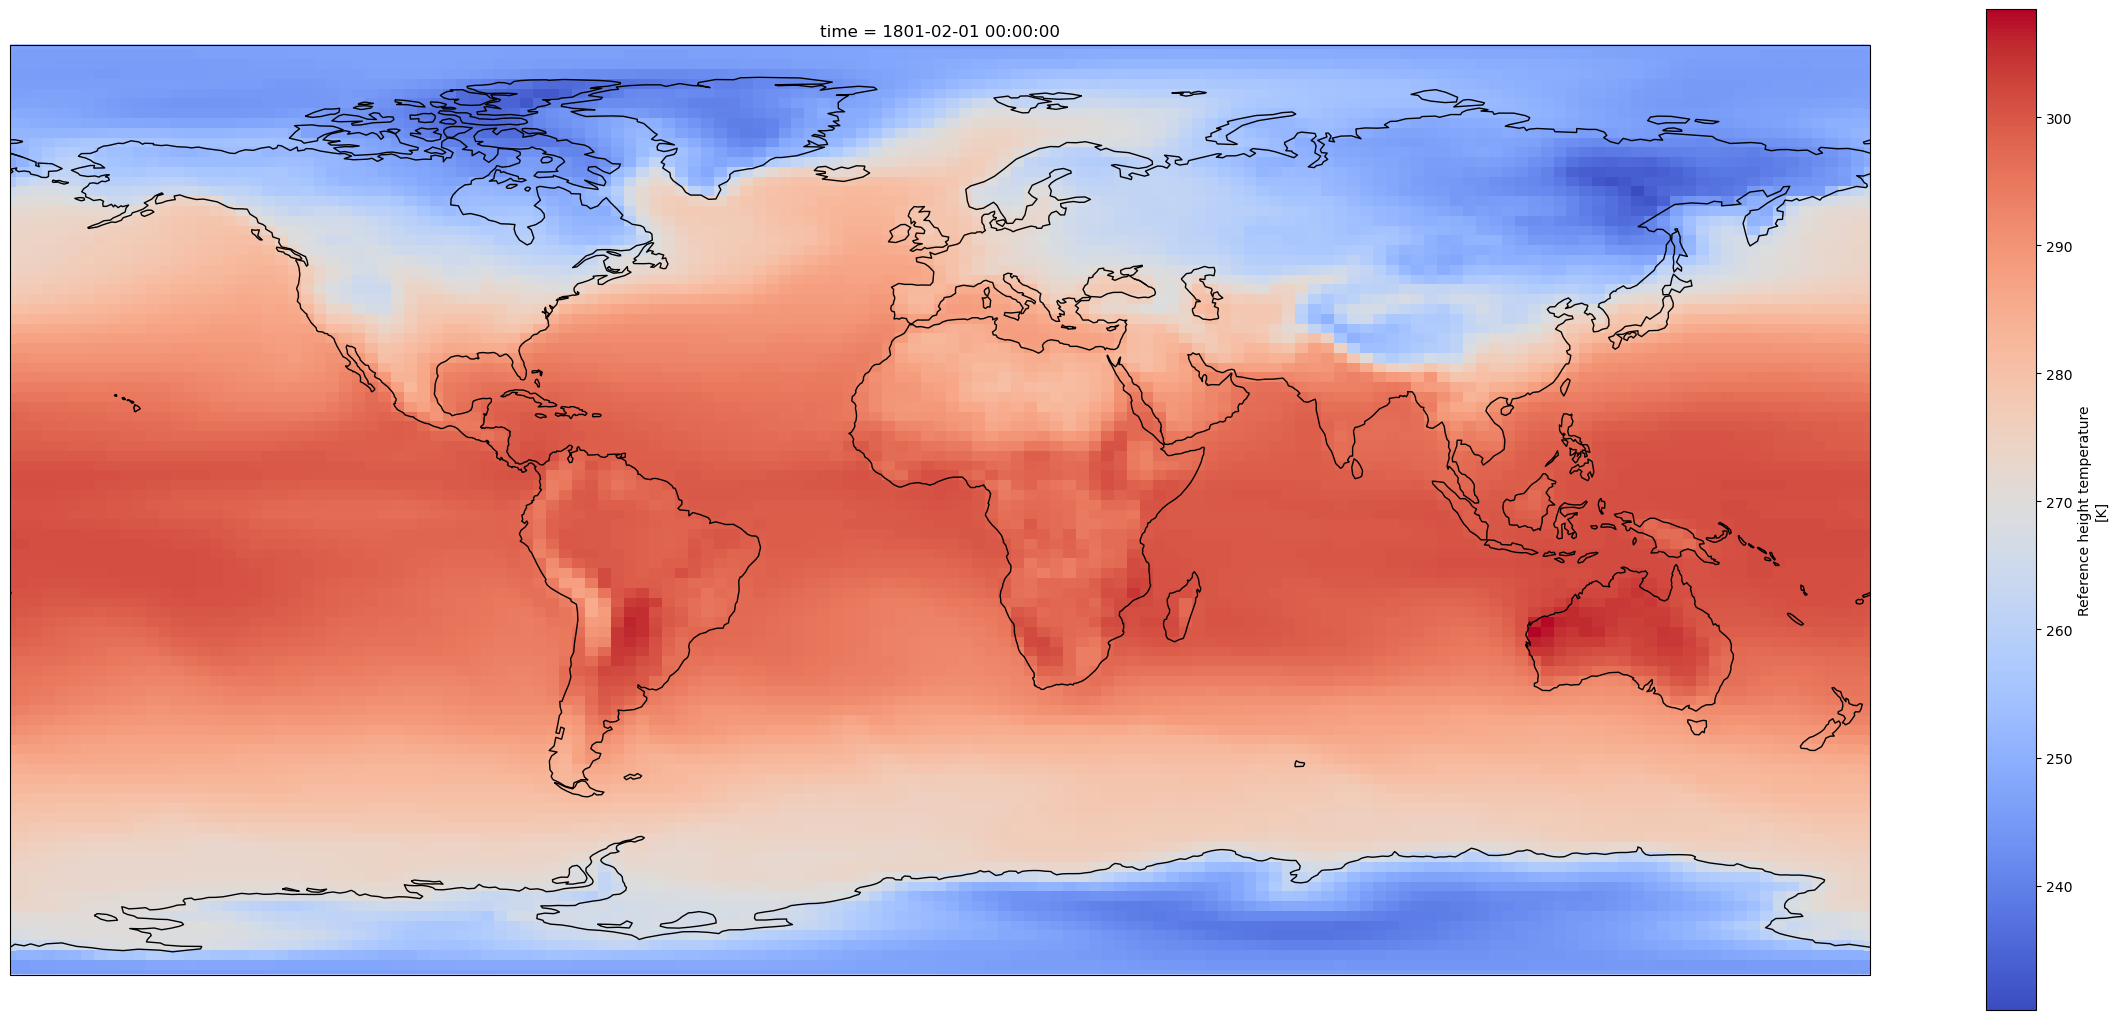

In [18]:
fig = plt.figure(1, figsize=[30,13])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
ds['TREFHT'].isel(time=0).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')

### Change plotting projection

Text(0.5, 1.0, 'February 1801')

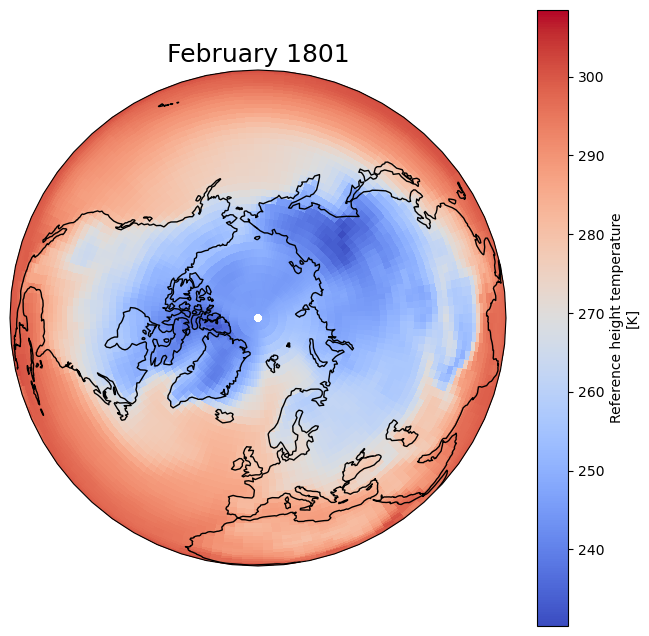

In [22]:
fig = plt.figure(1, figsize=[8, 8])

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()

# We need to project our data to the new Orthographic projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
ds['TREFHT'].isel(time=0).squeeze().plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

# One way to customize your title
plt.title(ds.time.values[0].strftime("%B %Y"), fontsize=18)